In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import numpy as np
import spacy
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
from sklearn import preprocessing

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Install Spacy Greek Library

In [ ]:
!spacy download el_core_news_lg

In [3]:
nlp = spacy.load("el_core_news_lg")

###Read the Dataset

In [4]:
tweets = []
for line in open('bank_greek_tweets.json', 'r'):
  tweets.append(json.loads(line))

In [6]:
# Store as a dataframe
df = pd.DataFrame(tweets)

### Clean tweets text using re and spacy

In [7]:
df_text = df[['id', 'text','sentiment']]

In [8]:
df_text['text'] = df_text['text'].str.lower()

<ipython-input-8-873a9e72dc0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['text'] = df_text['text'].str.lower()


In [ ]:
# removing special characters and numbers
remove_spec_char_numb = lambda x: re.sub(r'(http\S+)|rt|(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|([()\"#/;:<>{}`+=~|.!?_,])', '', str(x))
df_text['text'] = df_text['text'].apply(remove_spec_char_numb)

***Remove stopwords***

In [10]:
from spacy.lang.el.stop_words import STOP_WORDS

In [ ]:
print(STOP_WORDS)

In [12]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

In [ ]:
df_text['text'] = df_text['text'].apply(lambda x : " ".join(word for word in x.split() if word not in STOP_WORDS))

***Wordcloud***

In [14]:
allwords = ' '.join( [twts for twts in df_text['text']] )

In [15]:
count_words = df_text['text'].str.findall(r'(\w+)').str.len()
print(count_words.sum())

76462


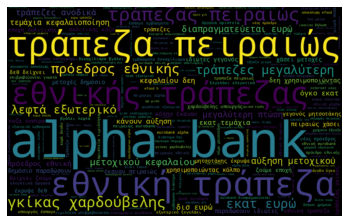

In [16]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
df_text_sample = df_text.iloc[:100]

In [ ]:
df_text_sample

In [ ]:
df_text['doc'] = [nlp(text) for text in df_text['text']]
for i in range(len(df_text)):
  df_text['doc'][i] = " ".join([token.lemma_ for token in df_text['doc'][i]])

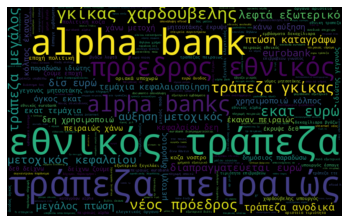

In [21]:
allwords = ' '.join( [twts for twts in df_text['doc']] )
wordcloud_doc = WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud_doc, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Word2Vec modelling for tweets

In [22]:
tokenized_tweet = df_text['doc'].apply(lambda x: x.split()) # tokenizing 

In [23]:
%%time

tokenized_tweet = df_text['doc'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(df_text['doc']), epochs=20)

CPU times: user 34.4 s, sys: 296 ms, total: 34.7 s
Wall time: 22.1 s


(1296319, 1571360)

In [ ]:
model_w2v.wv.most_similar(positive="νδ")

[('ήθελε', 0.8057215213775635),
 ('χτες', 0.7691739201545715),
 ('πτώχευση', 0.7677910327911377),
 ('ομού', 0.7575429677963257),
 ('συνεταίρος', 0.754366934299469),
 ('σκοπιά', 0.7474806308746338),
 ('107000', 0.7370306253433228),
 ('χλιδάτη', 0.7337576150894165),
 ('ανεξόφλητος', 0.7332636713981628),
 ('συνεταιράκιος', 0.7325660586357117)]

In [ ]:
def word_vector(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1, size))
      count += 1.
    except KeyError:  # handling the case where the token is not in vocabulary
        continue
  if count != 0:
      vec /= count
  return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

<ipython-input-34-409e244cd168>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += model_w2v[word].reshape((1, size))


(5000, 200)

In [25]:
document = nlp.pipe(df_text['doc'])
tweets_vector = np.array([tweet.vector for tweet in document])
print(tweets_vector.shape)

(5000, 300)


In [26]:
X = tweets_vector[: len(df_text)]
# The vector with the sentiment. Based on these values we will do the classification
y = df.iloc[:, 5].values

### Model classifier for the tweets

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y, stratify=y, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 300), (1000, 300), (4000,), (1000,))

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10,max_iter=1000).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.905


In [30]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.814


In [31]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
predictions = text_classifier.predict(X_test)
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[168  25  10  18]
 [ 12 240  13  16]
 [ 23  18 104  26]
 [ 26  10   8 283]]
                 precision    recall  f1-score   support

     Alpha Bank       0.73      0.76      0.75       221
Ethniki Trapeza       0.82      0.85      0.84       281
       Eurobank       0.77      0.61      0.68       171
   Piraeus Bank       0.83      0.87      0.84       327

       accuracy                           0.80      1000
      macro avg       0.79      0.77      0.78      1000
   weighted avg       0.79      0.80      0.79      1000

0.795
